# Temas selectos:
* Pruebas de hipótesis
* Bootstrap
* Análisis de componentes principales

# Pruebas de hipótesis
https://blog.minitab.com/es/entendiendo-las-pruebas-de-hipotesis-niveles-de-significancia-alfa-y-valores-p-en-estadistica

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

In [2]:
datos = pd.DataFrame({
    "sports":[17,51],
    "notes": [101,95],
    "popular": [75,38]
})

In [3]:
datos

,sports,notes,popular
0,17,101,75
1,51,95,38


In [4]:
# H0 = Independencia
# H1 = No independencia

In [5]:
chi2_contingency(datos)

(29.100448090958103,
 4.79642862958661e-07,
 2,
 array([[ 34.81167109, 100.33952255,  57.84880637],
        [ 33.18832891,  95.66047745,  55.15119363]]))

In [6]:
chi2_contingency(datos)[1] > 0.05

False

# Prueba de normalidad:
Shapiro-Wilk

In [7]:
import random
import numpy as np

In [8]:
def creaDataFrame_normal(n):
    consecutivos = range(n)
    random.seed(100)
    aleatorios = [np.random.normal() for x in range(n)]
    data = pd.DataFrame({
    "consecutivos" : consecutivos,
    "aleatorios"   : aleatorios
    })
    return(data)

In [9]:
datos = creaDataFrame_normal(100000)

<AxesSubplot:ylabel='Frequency'>

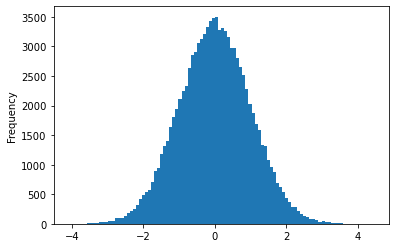

In [10]:
datos["aleatorios"].plot.hist(bins=100)

In [11]:
from scipy.stats import shapiro

In [12]:
stat, p = shapiro(datos["aleatorios"])

C:\Users\manyv\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
p

0.9295719265937805

In [14]:
p>0.05 # Si esto es verdadero, concluimos que tenemos una distribución normal

True

In [15]:
from statsmodels.graphics.gofplots import qqplot

In [16]:
import matplotlib.pyplot as plt

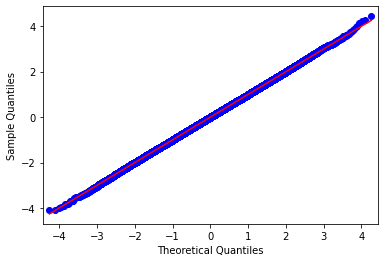

In [17]:
qqplot(datos["aleatorios"], line="s")
plt.show()

# Actividad:
Cargar los datos del banco, los vamos a limpiar, y vamos a calcular la prueba de Shapiro para revisar normalidad en la columna de Balance y EstimatedSalary

In [18]:
datos = pd.read_csv("./data/03Bank_Data.csv")

In [19]:
datos = datos.dropna(how="any")

In [20]:
datos = datos[datos["Balance"]>0]

In [21]:
datos = datos[datos["EstimatedSalary"]<max(datos["EstimatedSalary"])]

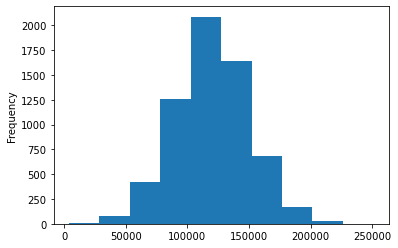

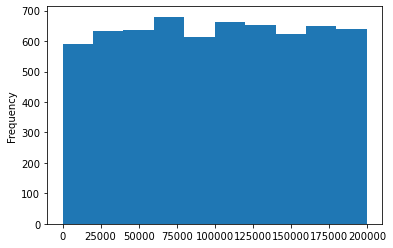

In [22]:
datos["Balance"].plot.hist()
plt.show()
datos["EstimatedSalary"].plot.hist()
plt.show()

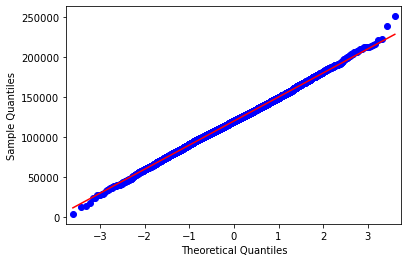

In [23]:
qqplot(datos["Balance"], line="s")
plt.show()

In [24]:
stat, p = shapiro(datos["Balance"])
print(p)
print(p>0.05)

0.02910509705543518
False


C:\Users\manyv\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


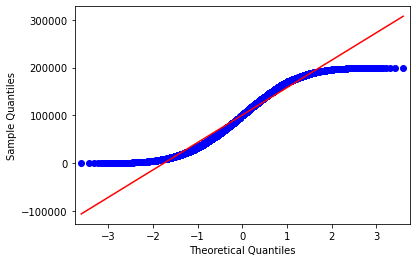

6.5961080533619194e-40
False


C:\Users\manyv\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
qqplot(datos["EstimatedSalary"], line="s")
plt.show()
stat, p = shapiro(datos["EstimatedSalary"])
print(p)
print(p>0.05)

# Bootstrap

In [26]:
datos = pd.read_csv("./data/03diamonds.csv")

In [27]:
datos["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

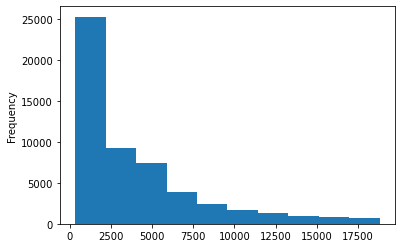

In [28]:
datos["price"].plot.hist()

El promedio de precio es: 3932. Pero notar que este promedio está sesgado por los valores extremos. 

In [29]:
# Vamos a hacer remuestreo con reemplazo

In [30]:
%%time
muestras = []

n = 10000
n_sample= 1000

for x in range(n):
    sub_datos = datos.sample(n=n_sample, replace=True)
    muestras.append(sub_datos["price"].mean())

Wall time: 4.07 s


In [31]:
muestras = pd.Series(muestras)

In [32]:
muestras.mean()

3933.696057800006

<AxesSubplot:ylabel='Frequency'>

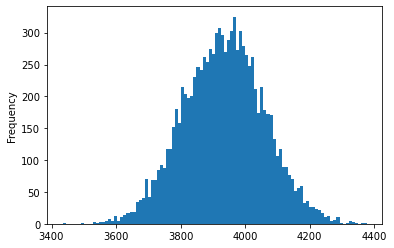

In [33]:
muestras.plot.hist(bins=100)

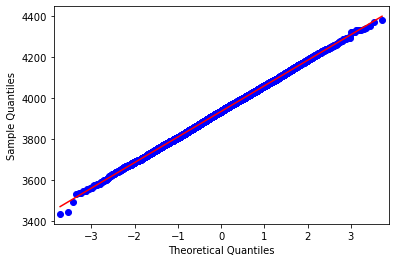

0.44047123193740845
True


C:\Users\manyv\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [34]:
qqplot(muestras, line="s")
plt.show()
stat, p = shapiro(muestras)
print(p)
print(p>0.05)

In [35]:
def plot_hist(x, p=5):
    plt.hist(x, alpha=.5)
    media = x.mean()
    intervalo_inferior = np.percentile(x, p/2.)
    intervalo_superior = np.percentile(x, 100-p/2.)
    plt.axvline(media)
    # 95% confidence interval 
    plt.axvline(intervalo_inferior, color='red', linewidth=3)
    plt.axvline(intervalo_superior, color='red', linewidth=3)
    print(f'''Media: {media},
          intervalo_inferior: {intervalo_inferior}
          intervalo_superior: {intervalo_superior}
          ''')
    plt.show()

Media: 3933.696057800006,
          intervalo_inferior: 3690.8964499999997
          intervalo_superior: 4178.1426
          


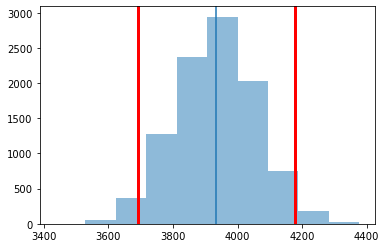

In [36]:
plot_hist(muestras)

# Actividad
Utilizando los datos de CarPrice_Assigment, ¿es el precio promedio de los autos tipo sedan diferente del precio promedio de los auto tipo hatchback?

In [37]:
datos = pd.read_csv("./data/03CarPrice_Assignment.csv")

In [38]:
datos["price"].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [39]:
datos["carbody"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [40]:
%%time
n = 10000
muestra_sedan= []
n_sample = 1000

datos_sedan = datos[datos["carbody"]=="sedan"]

for x in range(n):
    sub_datos = datos_sedan.sample(n_sample, replace=True)
    muestra_sedan.append(sub_datos["price"].mean())
    
muestra_sedan = pd.Series(muestra_sedan)

Wall time: 5.35 s


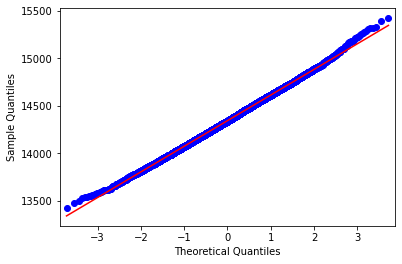

0.0031783212907612324
False


C:\Users\manyv\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [41]:
qqplot(muestra_sedan, line="s")
plt.show()
stat, p = shapiro(muestra_sedan)
print(p)
print(p>0.05)

Media: 14345.221591000014,
          intervalo_inferior: 13826.1261125
          intervalo_superior: 14874.0253625
          


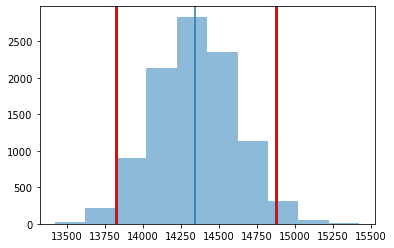

In [42]:
plot_hist(muestra_sedan)

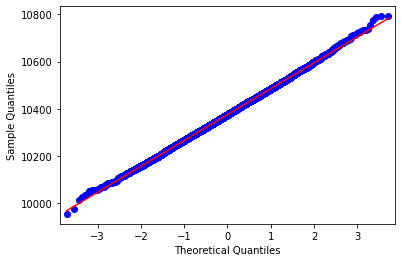

0.19127391278743744
True
Media: 10375.832353741034,
          intervalo_inferior: 10161.664678824996
          intervalo_superior: 10593.998719412497
          


C:\Users\manyv\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


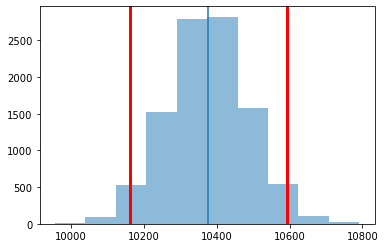

Wall time: 6.2 s


In [43]:
%%time
n = 10000
muestra_hatchback= []
n_sample = 2000

datos_hatchback = datos[datos["carbody"]=="hatchback"]

for x in range(n):
    sub_datos = datos_hatchback.sample(n_sample, replace=True)
    muestra_hatchback.append(sub_datos["price"].mean())
    
muestra_hatchback = pd.Series(muestra_hatchback)

qqplot(muestra_hatchback, line="s")
plt.show()
stat, p = shapiro(muestra_hatchback)
print(p)
print(p>0.05)

plot_hist(muestra_hatchback)
plt.show()

# PCA (Principal Component Analysis)
Análisis de componentes principales

In [44]:
from sklearn import datasets
iris = datasets.load_iris()

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [46]:
datos = pd.DataFrame(iris["data"], columns=iris["feature_names"])

In [47]:
datos.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(datos))

scaled_data.head()


,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [49]:
scaled_data.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [50]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca)

data_pca.head()

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [52]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [51]:
sum(pca.explained_variance_ratio_) # varianza explicada

0.9581320720000164

In [53]:
import seaborn as sns 

In [54]:
datos.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

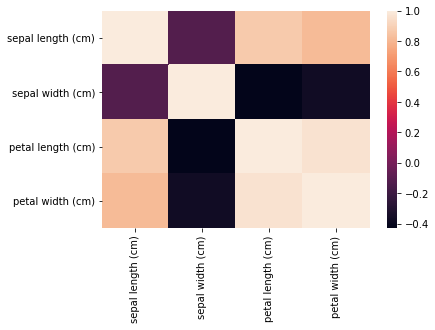

In [55]:
sns.heatmap(datos.corr())

In [57]:
data_pca.columns = ["PCA1","PCA2"]

In [58]:
data_pca

,PCA1,PCA2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [59]:
data_pca["target"] = iris["target"]

In [62]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
data_pca.corr()

,PCA1,PCA2,target
PCA1,1.000000e+00,-2.455602e-16,0.944665
PCA2,-2.455602e-16,1.000000e+00,-0.011822
target,9.446652e-01,-1.182168e-02,1.000000


<AxesSubplot:>

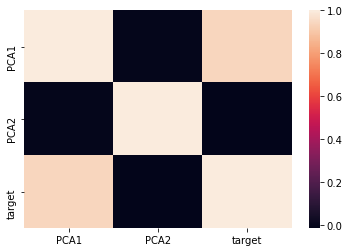

In [66]:
sns.heatmap(data_pca.corr())

In [67]:
def color(x):
    if x==0: return "r"
    if x==1: return "b"
    if x==2: return "g"

In [68]:
data_pca["color"] = data_pca["target"].apply(color)

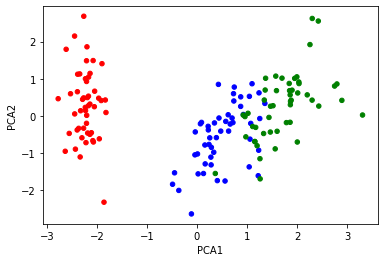

In [72]:
data_pca.plot(kind="scatter", x="PCA1", y="PCA2", c="color")
plt.show()

In [76]:
loadings = pd.DataFrame(pca.components_.T, columns=["PCA1","PCA2"], index = iris.feature_names)
loadings

,PCA1,PCA2
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


# Actividad
Mejora tu modelo de estimación del precio de los carros...

In [77]:
datos = pd.read_csv("./data/03CarPrice_Assignment.csv")

In [81]:
X = datos[["wheelbase","carlength","carwidth","carheight","enginesize","boreratio","stroke","compressionratio"]]

<AxesSubplot:>

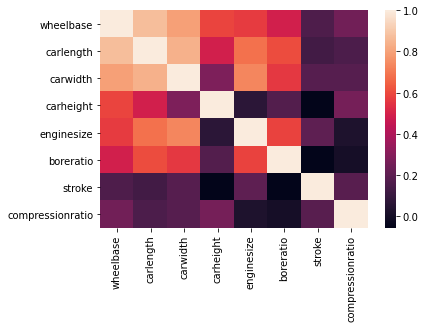

In [82]:
sns.heatmap(X.corr())

In [83]:
# Estandarizamos nuestros datos
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(X))
scaled_data

,0,1,2,3,4,5,6,7
0,-1.690772,-0.426521,-0.844782,-2.020417,0.074449,0.519071,-1.839377,-0.288349
1,-1.690772,-0.426521,-0.844782,-2.020417,0.074449,0.519071,-1.839377,-0.288349
2,-0.708596,-0.231513,-0.190566,-0.543527,0.604046,-2.404880,0.685946,-0.288349
3,0.173698,0.207256,0.136542,0.235942,-0.431076,-0.517266,0.462183,-0.035973
4,0.107110,0.207256,0.230001,0.235942,0.218885,-0.517266,0.462183,-0.540725
...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.339248,1.666445,-0.336970,-0.162161
201,1.721873,1.198549,1.351515,0.728239,0.339248,1.666445,-0.336970,-0.364062
202,1.721873,1.198549,1.398245,0.728239,1.109571,0.926204,-1.232021,-0.338824
203,1.721873,1.198549,1.398245,0.728239,0.435538,-1.183483,0.462183,3.244916


In [107]:
pca = PCA(n_components=5)
pca.fit(scaled_data)

PCA(n_components=5)

In [108]:
pca.explained_variance_ratio_

array([0.49711816, 0.15966207, 0.14197471, 0.08574106, 0.05400729])

In [109]:
sum(pca.explained_variance_ratio_)

0.9385032906567997

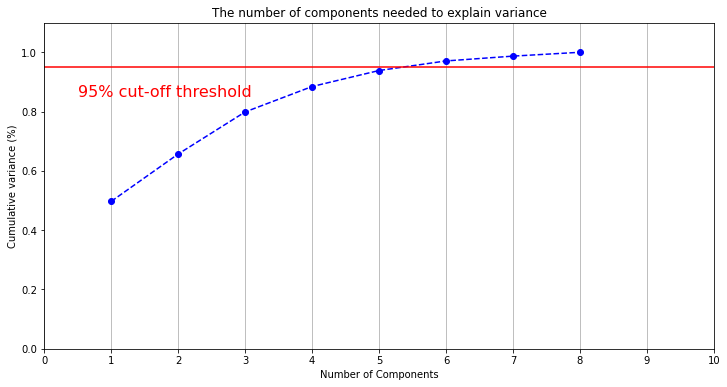

In [110]:
pca = PCA().fit(scaled_data)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 9, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [131]:
pca = PCA(n_components=.95)
pca.fit(scaled_data)

PCA(n_components=0.95)

In [132]:
pca.explained_variance_ratio_

array([0.49711816, 0.15966207, 0.14197471, 0.08574106, 0.05400729,
       0.03233119])

In [133]:
len(pca.explained_variance_ratio_)

6

In [134]:
loadings = pd.DataFrame(pca.components_.T, index = ["wheelbase","carlength","carwidth","carheight","enginesize","boreratio","stroke","compressionratio"])
loadings

,0,1,2,3,4,5
wheelbase,0.457300,-0.166663,0.083592,-0.187318,0.147153,-0.279160
carlength,0.474772,0.007655,0.072228,-0.114572,0.099051,-0.168673
carwidth,0.454544,0.097511,-0.099286,0.040834,0.361324,-0.333418
carheight,0.249244,-0.519550,0.443699,-0.385345,-0.258873,0.399602
enginesize,0.390071,0.344644,-0.221305,0.120194,0.214879,0.775702
boreratio,0.346392,0.348447,0.150985,0.345165,-0.767455,-0.132360
stroke,0.096524,-0.178338,-0.817447,-0.390244,-0.367455,-0.032808
compressionratio,0.123596,-0.648633,-0.202677,0.718158,0.027957,0.049613


In [135]:
data_pca = pca.transform(scaled_data)

In [136]:
data_pca = pd.DataFrame(data_pca)

<AxesSubplot:>

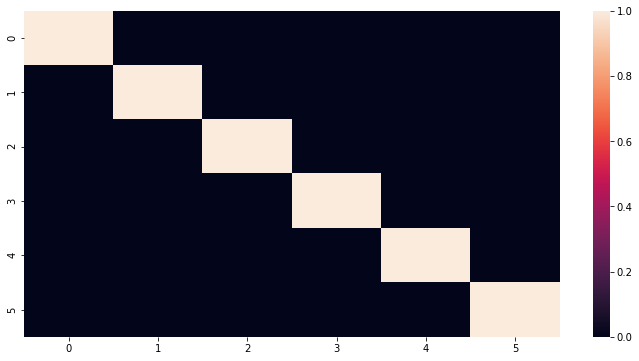

In [137]:
sns.heatmap(data_pca.corr())

In [138]:
X = data_pca
y = datos["price"]

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=5) # partimos nuestros datos

regresion = LinearRegression() # instanciamos nuestro modelo

regresion.fit(X_train, y_train) # entrenamos nuestro modelo, con datos de entrenamiento

regresion.score(X_test, y_test) # evaluamos el rendimiento de nuestro modelo con datos de test

0.8783405007684794

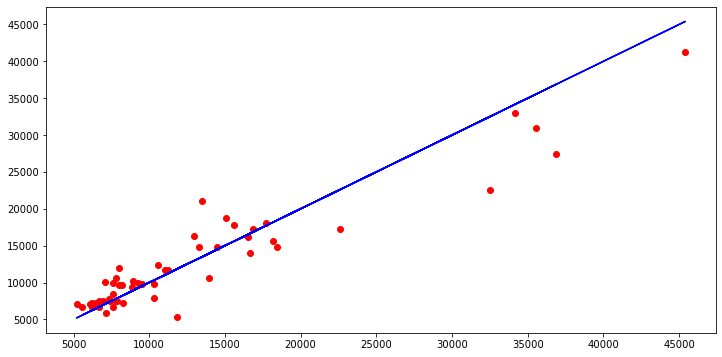

In [141]:
plt.scatter(y_test, regresion.predict(X_test), color = "red")
plt.plot(y_test, y_test, color = "blue")
plt.show()